<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/EDA_Level2___Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA Diabetes Prediction Dataset

Diabetes is a chronic condition that affects millions worldwide, making early detection and prediction crucial for preventive healthcare. In this assignment, we analyze a dataset containing various health-related features such as glucose levels, BMI, blood pressure, age, and more, to understand their relationship with diabetes.


We perform exploratory data analysis (EDA), visualize feature distributions, identify outliers, and explore correlations between variables. The goal is to gain meaningful insights into how different factors contribute to the likelihood of diabetes and prepare the data for further predictive modeling.

In [1]:
# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#import the datasets
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.ndim


2

In [5]:
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
# Drop rows with NaN values
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Exploration and Preprocessing

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies: The number of pregnancies ranges from 0 to 17, with an average of around 3.85. Some women have never been pregnant.

Glucose: The mean glucose level is 120.89, but the minimum value is 0, which is unrealistic and likely represents missing or incorrect data.

Blood Pressure: The average blood pressure is 69.1, but there are some zero values, which might need further investigation.

Skin Thickness: The median value is 23, but many entries have 0, which may indicate missing values.

Insulin: The insulin levels vary widely (0 to 846), with a median of 30.5. Many zero values suggest missing data.

BMI (Body Mass Index): The average BMI is 31.99, which falls in the overweight category. However, some values are 0, which is not possible and may need correction.

Diabetes Pedigree Function: The values range from 0.078 to 2.42, with an average of 0.47, indicating the genetic risk of diabetes.

Age: The median age is 29, with a maximum of 81, showing a diverse age group in the dataset.

Outcome (Diabetes Status): Around 35% of the individuals have diabetes (Outcome = 1), while 65% do not (Outcome = 0). The Outcome distribution shows that diabetes is present in about one-third of the cases.

<ipython-input-12-fab682b51392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


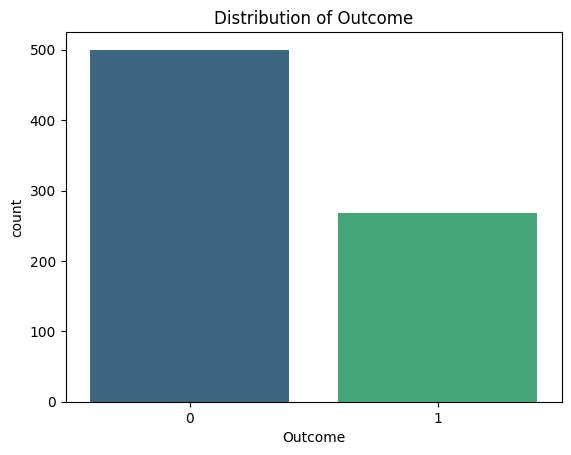

In [12]:
# Target variable distribution
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Outcome')
plt.show()

The dataset is imbalanced, with more non-diabetic cases (Outcome = 0) than diabetic cases (Outcome = 1).
Around 65% of individuals do not have diabetes, while about 35% have diabetes.
This imbalance may affect model performance if not handled properly. Techniques like oversampling (SMOTE) or class weighting may help in classification tasks.

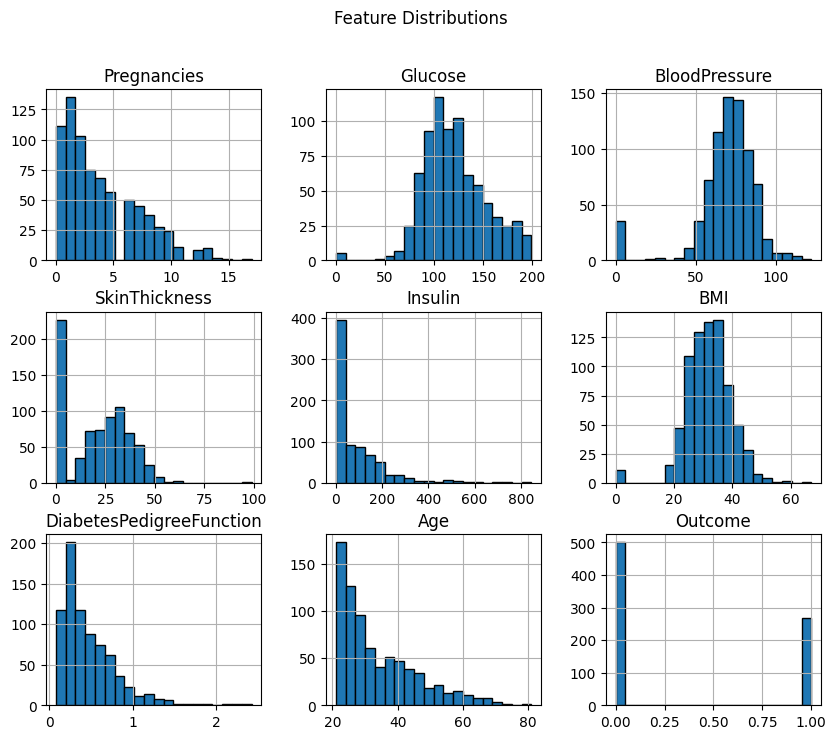

In [13]:
# Histograms for numerical features
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


Some features (Glucose, Blood Pressure, Skin Thickness, Insulin, BMI) contain zero values, which may indicate missing data.
Right-skewed distributions in Insulin, Age, and Diabetes Pedigree Function suggest the presence of outliers.
The dataset may require data cleaning (handling missing values and outliers) before modeling.

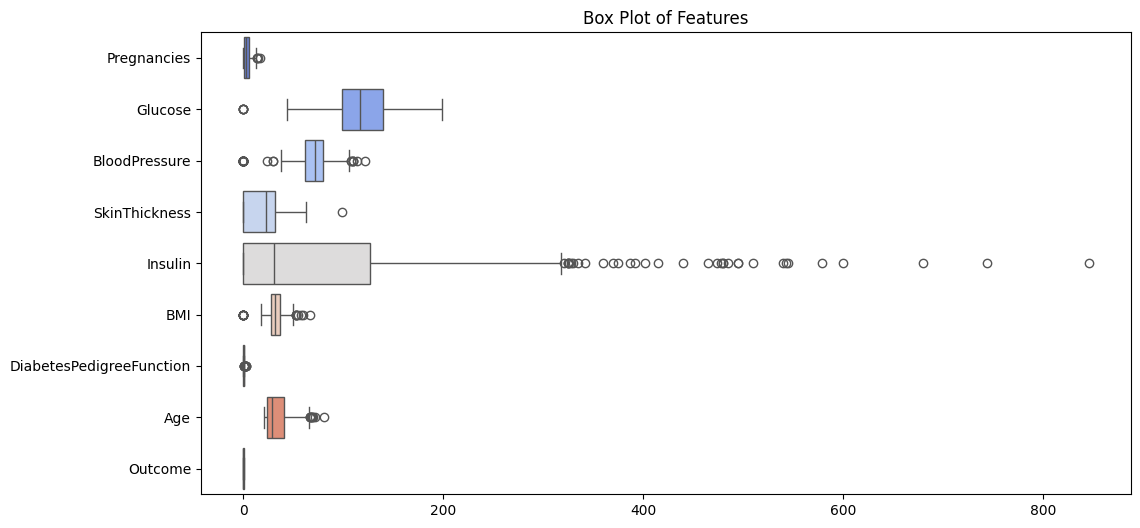

In [14]:
# Box plots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h', palette='coolwarm')
plt.title('Box Plot of Features')
plt.show()

Outliers Present: Several features, especially Insulin, Skin Thickness, and Diabetes Pedigree Function, have extreme outliers.

Pregnancies: Some high values exist, but most data is within a reasonable range.

Glucose: No extreme outliers, but a few lower values may indicate missing or incorrect data.

Blood Pressure: Some very low values, including zero, may indicate missing values.

Skin Thickness & Insulin: Significant outliers, suggesting the need for data cleaning or transformation.

BMI: A few extreme values, but mostly follows a normal range.

Age: No major outliers, but a right-skewed distribution is visible.

In [ ]:
#Handling outliers and zero values to get better visualiztions

#Replace Zero Values in specific columns (except 'Pregnancies' and 'Outcome') using median imputation.
#Handle Outliers using the Interquartile Range (IQR) method, replacing extreme values with upper/lower bounds.

In [16]:
# Columns where zero values are unrealistic (indicating missing data)
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median values
for col in zero_columns:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

In [17]:
# Function to handle outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply the function to all numeric columns except 'Outcome'
for col in df.columns:
    if col not in ['Outcome']:
        remove_outliers(df, col)

# Display the cleaned dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


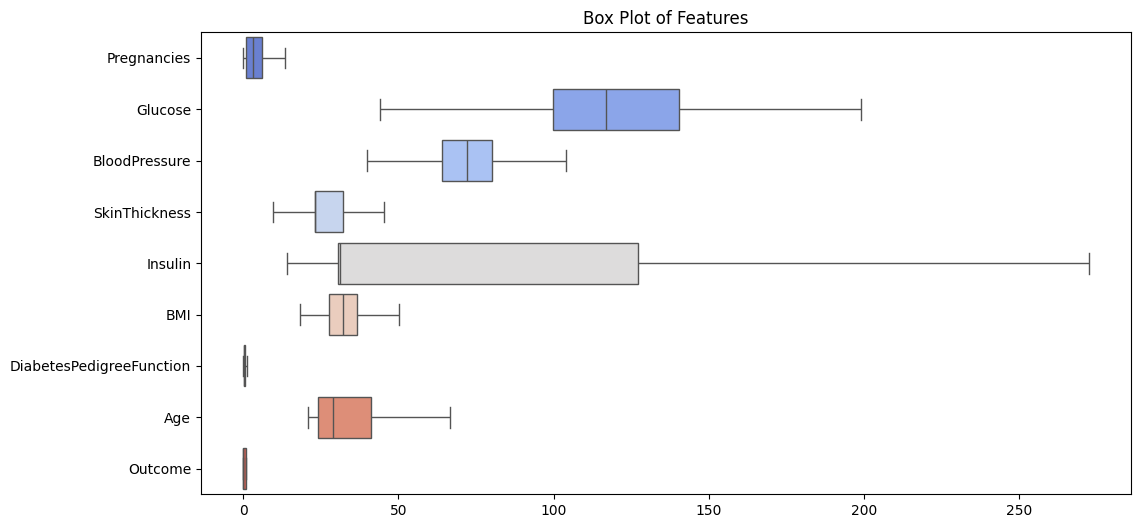

In [18]:
# Box plots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h', palette='coolwarm')
plt.title('Box Plot of Features')
plt.show()

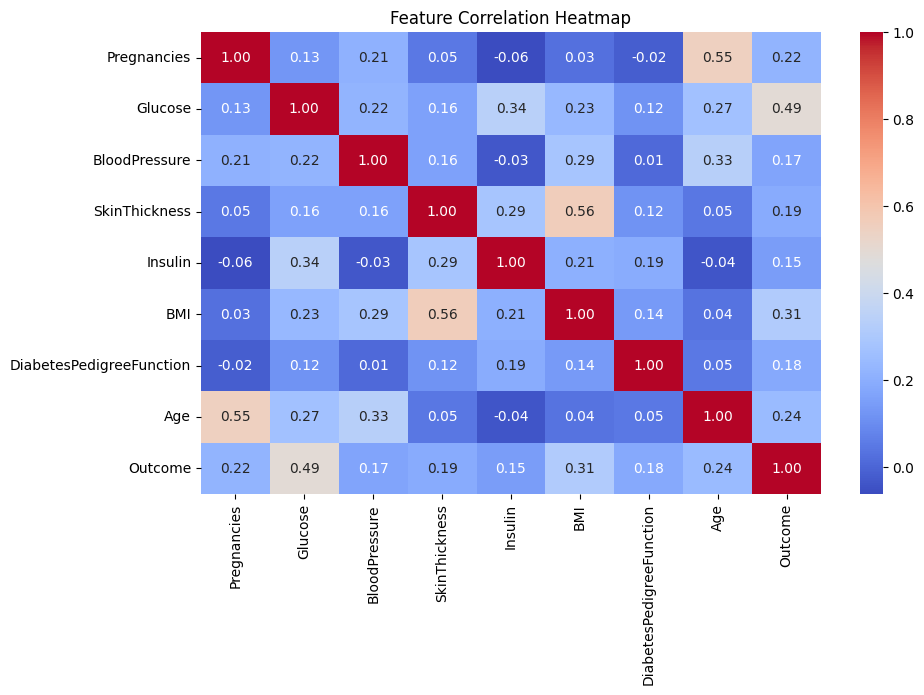

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Strong Positive Correlations:

Glucose and Outcome: A high positive correlation (0.49) indicates that higher glucose levels are strongly associated with the likelihood of diabetes.
BMI and SkinThickness: A significant positive correlation (0.56) suggests that individuals with higher BMI values also tend to have higher skin thickness.

Moderate Correlations:

Age and Pregnancies: A moderate correlation (0.55) suggests that older individuals tend to have more pregnancies.
BMI and Outcome: A moderate positive correlation (0.31) shows that higher BMI might be associated with a higher likelihood of diabetes.

Low or Negligible Correlations:

Features like Insulin, SkinThickness, and BloodPressure have weak correlations with Outcome. These might not be strong individual predictors but could contribute to a model when combined with other features.

Negative Correlations:

Some features, such as Insulin and Pregnancies, have weak negative correlations with other variables, indicating they may not have a strong direct influence in those relationships.

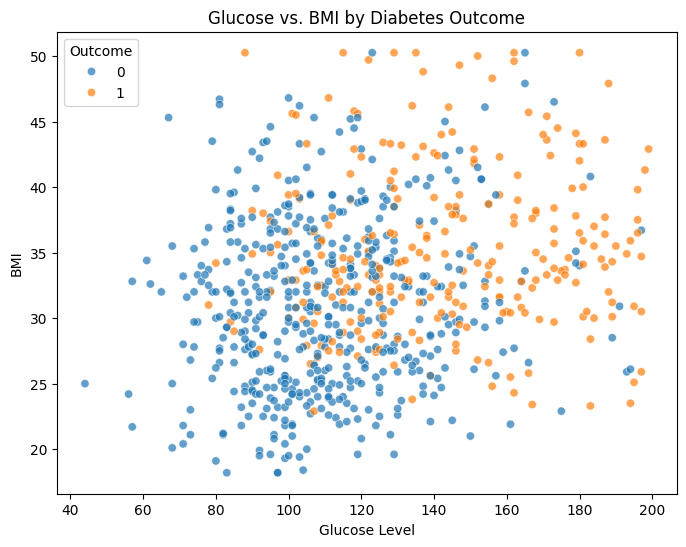

In [20]:
#Glucose vs. BMI (Key risk factors for diabetes)


plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], alpha=0.7)
plt.title("Glucose vs. BMI by Diabetes Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.show()

Higher glucose and BMI levels are associated with a higher chance of diabetes.


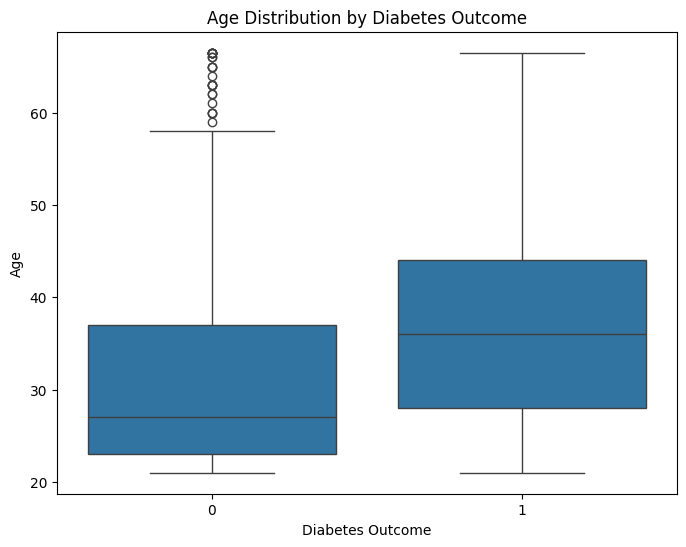

In [21]:
#Age vs. Pregnancies (Does Age affect pregnancies?)

plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Age")
plt.show()

Older individuals have a higher risk of diabetes, possibly due to lifestyle and hormonal factors.

Through this analysis, we discovered that glucose levels and BMI are key indicators of diabetes risk, as they show strong positive correlations with the outcome. Additionally, age and pregnancy history also play a moderate role in diabetes likelihood. However, features like insulin and blood pressure have weaker correlations with diabetes on their own.


The visualizations, such as the correlation heatmap, scatter plots, and distribution plots, helped in better understanding data trends, potential risk factors, and the need for proper data preprocessing (handling zero values and outliers).


These insights provide a foundation for building a machine learning model to predict diabetes more effectively. Future steps could include applying feature engineering, model selection, and hyperparameter tuning to enhance predictive accuracy.